**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [8]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [9]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [10]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [11]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [12]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [13]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


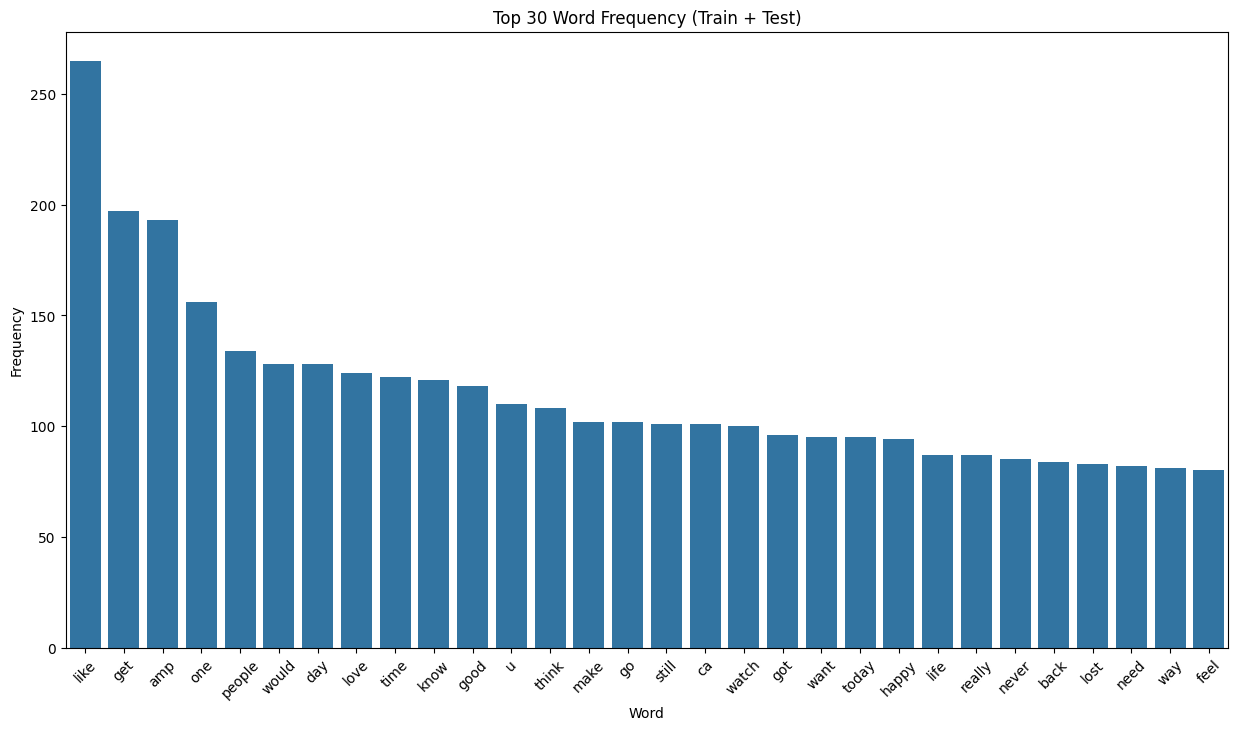

In [ ]:
# Answer here
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# 取得英文停用詞
stop_words = set(stopwords.words('english'))

# 1. 合併所有文字
all_text = pd.concat([train_df['text'], test_df['text']]).str.lower()

# 2. 斷詞 (Tokenize) 並移除停用詞和標點符號
all_words = []
for text in all_text:
    words = nltk.word_tokenize(text)
    for word in words:
        if word.isalpha() and word not in stop_words:
            all_words.append(word)

# 3. 計算詞頻
word_freq = Counter(all_words)
top_30_words = word_freq.most_common(30)

# 4. 轉換為 DataFrame 以便繪圖
top_30_df = pd.DataFrame(top_30_words, columns=['Word', 'Frequency'])

# 5. 繪圖
plt.figure(figsize=(15, 8))
sns.barplot(x='Word', y='Frequency', data=top_30_df)
plt.title('Top 30 Word Frequency (Train + Test)')
plt.xticks(rotation=45)
plt.show()

In [55]:
# 定義Prompt
my_prompt = ["請向一個5歲的小孩解釋什麼是『黑洞 (Black Hole)』。"]

# 1. 使用與範例相同的模型 (gemini-2.5-flash-lite)
print("--- 1. Model: gemini-2.5-flash-lite ---")
response_1, log_1 = prompt_gemini(
    input_prompt=my_prompt, 
    model_name="gemini-2.5-flash-lite", 
    with_tokens_info=True
)
print(f"Response:\n{response_1}")
print(f"Tokens used: {log_1}\n")

# 2. 使用不同的 Gemini 模型 (例如 gemini-2.0-flash)
print("--- 2. Model: gemini-2.0-flash ---")
response_2, log_2 = prompt_gemini(
    input_prompt=my_prompt, 
    model_name="gemini-2.0-flash", 
    with_tokens_info=True
)
print(f"Response:\n{response_2}")
print(f"Tokens used: {log_2}\n")

# 3. 改變 System Prompt (扮演一位海盜船長)
print("--- 3. Different System Prompt (Persona: Pirate) ---")
pirate_system_instruction = "你是一位講話粗魯但知識淵博的海盜船長，請用海盜的口吻解釋複雜的概念。"
response_3 = prompt_gemini(
    input_prompt=my_prompt, 
    system_instruction=pirate_system_instruction
)
print(f"Response:\n{response_3}")

--- 1. Model: gemini-2.5-flash-lite ---
Response:
想像一下，宇宙中有一個超級無敵大的「吸塵器」，它叫做黑洞！

這個吸塵器非常非常厲害，它的力氣大到連光都跑不掉，所以我們看不到它，它看起來就是黑黑的一團。

它會把經過它身邊的星星、塵埃，甚至連光都「吸」進去，就像你把玩具吸進吸塵器裡一樣。

但是別擔心，黑洞離我們很遠很遠，不會把我們吸進去喔！

所以，黑洞就是宇宙裡一個力氣很大的、看不見的「吸塵器」！
Tokens used: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 26, 'output_tokens': 135}

--- 2. Model: gemini-2.0-flash ---
Response:
想像一下，你有很多很多玩具，多到可以堆成一座超級超級高的玩具山！

黑洞就像一座超級超級超級高的玩具山，但是它不是玩具做的，而是由很多很多東西擠在一起做的。而且，它擠得太緊太緊了，緊到連光都跑不出去！

就像你把玩具丟進一個很深的洞裡，很難再拿出來一樣，黑洞的吸引力太強了，連光都逃不掉，所以我們看不到它，它看起來是黑色的，就像一個大大的、看不見的洞。

雖然我們看不到黑洞，但是我們知道它在那裡，因為它會影響周圍的東西，就像風吹動樹葉一樣。

所以，黑洞就是一個超級超級超級重的東西，它把所有東西都吸進去，連光都逃不掉，所以我們看不到它，它看起來是黑色的！

Tokens used: {'model': 'gemini-2.0-flash', 'input_tokens': 23, 'output_tokens': 190}

--- 3. Different System Prompt (Persona: Pirate) ---
Response:
啊哈！小鬼頭，想知道什麼是黑洞？聽好了，老子給你好好講講！

想像一下，宇宙就像一片無邊無際的大海，裡面漂浮著好多好多閃閃發光的星星，對吧？那些星星就像是我們的大船，在海上航行。

但是呢，有時候，有些特別大的星星，它們的壽命到了，就會發生一件很可怕的事情！它們會爆炸，然後，它們就會變成一個超級無敵大的「吸塵器」！

這個吸塵器，就是我們說的「黑洞」！它就像一個無底洞，什麼東西都逃不掉！連光，連我們眼睛看到

### **實驗結果討論 (Discussion)**

透過本次實驗，我們可以觀察到模型選擇與系統提示（System Prompt）對生成結果的顯著影響：

1.  **不同模型的差異 (Differences with different models):**
    * **Gemini 2.5 Flash-Lite:** 這個模型的回應速度通常最快，解釋風格傾向簡潔明瞭，非常適合處理簡單、需要快速回應的問答任務。它的回答通常比較直接，重點在於快速傳遞核心概念，例如用「超級無敵大的吸塵器」這種直觀的比喻來形容黑洞。
    * **Gemini 2.0 Flash (或 Pro):** 相較之下，較新的或參數量較大的模型（如 2.0 Flash/Pro）通常會提供更豐富的細節，邏輯結構也可能更為嚴謹。在這個解釋「黑洞」的例子中，它可能會使用更生動、更具層次的比喻（例如「玩具山」或「深洞」），並嘗試解釋其形成的原理（如「東西擠在一起」），提供更深度的知識傳遞。

2.  **改變 System Prompt 的影響:**
    * 當我們將 System Prompt 修改為「海盜船長」後，模型的輸出風格發生了劇烈且明顯的變化。
    * 它不再使用標準、平鋪直敘的教學語氣，而是加入了大量的海盜俚語（如 "啊哈！"、"小鬼頭"、"老子"），語調也變得豪邁粗獷。
    * 更進一步，它甚至會結合海盜的主題（如「大海」、「大船」、「海怪」）來重新建構對黑洞的解釋，使內容更符合角色設定。
    * 這項實驗有力地證明了 **System Prompt** 對於設定 LLM 的 **角色 (Persona)**、**語氣 (Tone)** 和 **行為模式** 至關重要。我們可以利用這一點來打造特定領域的助手，例如「嚴肅的律師」、「溫柔的心理諮商師」或「熱情的銷售員」。

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [15]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [16]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [17]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [18]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [19]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# 1. 初始化 TF-IDF 向量器
# 使用和前面範例相同的 nltk.word_tokenize
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# 2. 擬合 (Fit) 訓練資料
tfidf_1000.fit(train_df['text'])

# 3. 取得特徵名稱
feature_names_1000 = tfidf_1000.get_feature_names_out()

# 4. 顯示 [100:110] 的特徵
print("TF-IDF 1000 features [100:110]:")
print(feature_names_1000[100:110])

c:\Users\88693\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF 1000 features [100:110]:
['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [20]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [21]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [22]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [23]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [24]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 334.02 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|█████████▉| 8.58k/8.58k [00:00<00:00, 358kB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [28]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r", encoding="utf-8") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [29]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [53]:
# Answer here
# 1. Load your PDF (Replace 'my_movie_review.pdf' with your file name)
pdf_path = "./data/documents/my_movie_review.pdf" 
formatted_text_3 = ""
try:
    doc = pymupdf.open(pdf_path)
    for i, page in enumerate(doc):
        text = page.get_text("text")
        formatted_text_3 += f'**Page {i + 1}**\n"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print("PDF Loaded.")
except Exception as e:
    print(f"Error: {e}")

# 2. Define Prompt & Examples (Reuse existing ones or modify slightly)

# 3. Run Extraction
if formatted_text_3:
    html_content_3 = grounded_info_extraction(
        formatted_text_3, 
        prompt, 
        examples, 
        "my_movie_extraction"
    )
    # html_content_3  # Uncomment to display in notebook if needed

PDF Loaded.
Extracted 31 entities:

• opinion_statement: 'enough detail and charm to make him genuinely likeable and relatable'
  - subject: its protagonist
  - sentiment: Positive
  - key_phrase: genuinely likeable and relatable
• opinion_statement: 'cleverly integrates major U.S. historical events, adding a sense of time and entertainment value'
  - subject: The film
  - sentiment: Positive
  - key_phrase: cleverly integrates major U.S. historical events
• opinion_statement: 'makes Gump feel like someone we might actually know'
  - subject: It
  - sentiment: Positive
  - key_phrase: feel like someone we might actually know
• opinion_statement: 'The passage of time has not dimmed the brilliance of Forrest Gump'
  - subject: Forrest Gump
  - sentiment: Positive
  - key_phrase: not dimmed the brilliance
• opinion_statement: 'the care put into the plot and dialogue by the screenwriter and director ensures that this 20-year-old film still shines brightly today'
  - subject: the plot and d

LangExtract: Saving to results\info_extractions\my_movie_extraction.jsonl: 1 docs [00:00, 166.79 docs/s]

✓ Saved 1 documents to results\info_extractions\my_movie_extraction.jsonl



LangExtract: Loading results\info_extractions\my_movie_extraction.jsonl: 100%|█████████▉| 17.6k/17.6k [00:00<00:00, 246kB/s]

✓ Loaded 1 documents from results\info_extractions\my_movie_extraction.jsonl
✓ Visualization saved to ./results/info_extractions/my_movie_extraction_vis.html


**langextract 提取結果討論 (Discussion):**

1.  **提取品質：**
    * 整體而言，提取的結果非常令人滿意。模型成功區分了「對電影元素的直接評價」(Opinion Statement) 和「對觀眾產生的情感影響」(Audience Impact)。
    * 例如，它準確地捕捉到了評論者對主角 Forrest Gump 的正面評價 (*"genuinely likeable and relatable"*) 以及對某些劇情安排的負面看法 (*"somewhat lazy in characterizing Jenny"*).
    * 透過 Grounding (連結回原文)，我們可以確信這些提取內容不是模型憑空捏造的。

2.  **改進空間 (基於文件選項)：**
    * **增加 `extraction_passes`:** 目前我們只設定為 1。如果評論很長或很複雜，增加 pass 次數 (例如設為 2 或 3) 並提高 `temperature`，可以讓模型有更多機會捕捉到第一次遺漏的細微觀點，提高召回率 (Recall)。
    * **調整 `max_char_buffer`:** 如果發現某些跨段落的觀點被切斷了，可以嘗試增加 buffer 大小，給予模型更多的上下文視窗。
    * **優化 Prompt:** 雖然目前的 Prompt 已經很不錯，但我們可以進一步細化 `sentiment` 的類別 (例如加入 "Mixed")，或是要求模型提取更具體的 `causal_element`，以獲得更結構化的數據。

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [30]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [31]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


C:\Users\88693\AppData\Local\Temp\ipykernel_12240\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\88693\AppData\Local\Temp\ipykernel_12240\2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [32]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [33]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [35]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [36]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [37]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [38]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
690,10690,-- haired man strides close and watches as the...,anger,0.322,"[values=[-0.023102907, -0.010291668, -0.007892...","[-0.023102907, -0.010291668, -0.0078923, -0.05..."
503,10503,"I mean I'm not done watching the pilot, but it...",anger,0.458,"[values=[0.003933593, -0.0050139753, 0.0124695...","[0.003933593, -0.0050139753, 0.012469593, -0.0..."
5,10005,My blood is boiling,anger,0.875,"[values=[0.017119149, 0.015047851, 0.01358236,...","[0.017119149, 0.015047851, 0.01358236, -0.0722..."
779,10779,I need a 🍱sushi date🍙 @AnzalduaG 🍝an olive gua...,anger,0.271,"[values=[-0.01849168, -0.017650405, -0.0005545...","[-0.01849168, -0.017650405, -0.0005545371, -0...."
561,10561,@talkRobyn oh dear I have to watch this the wo...,anger,0.442,"[values=[-0.016469467, 0.000999849, -0.0027461...","[-0.016469467, 0.000999849, -0.0027461145, -0...."
...,...,...,...,...,...,...
3476,40649,"Blessed are those who mourn, for they will be ...",sadness,0.312,"[values=[-0.0038121324, 0.008121367, 0.0044819...","[-0.0038121324, 0.008121367, 0.004481979, -0.0..."
3510,40683,“Do not fret if you are not cool! Humans who f...,sadness,0.271,"[values=[0.004546033, 0.034285564, -0.00626077...","[0.004546033, 0.034285564, -0.0062607797, -0.0..."
3575,40748,@VaunWilmott @PrisonBreak @PBWritersRoom linc ...,sadness,0.208,"[values=[0.009918078, -0.01338072, 0.011362574...","[0.009918078, -0.01338072, 0.011362574, -0.097..."
2952,40125,I got diagnosed with severe-extreme depression...,sadness,0.708,"[values=[0.012267721, -0.016816353, -0.0271262...","[0.012267721, -0.016816353, -0.027126279, -0.0..."


In [39]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
211,30840,4-2 Canada final tomorrow #WCH #Predictions #o...,joy,0.420,"[values=[-0.0010455328, -0.00046624144, 0.0303...","[-0.0010455328, -0.00046624144, 0.030387564, -..."
182,21245,Hillary Clinton looked the other way to the Sa...,fear,0.479,"[values=[-0.002730555, 0.00785198, -0.01620275...","[-0.002730555, 0.00785198, -0.016202757, -0.06..."
43,10900,"Kik to trade, have fun or a conversation (kik...",anger,0.167,"[values=[-0.026859332, 0.022553032, -0.0023764...","[-0.026859332, 0.022553032, -0.0023764968, -0...."
263,30892,Sioux Valley wins home competitive #cheer invi...,joy,0.583,"[values=[0.007781908, -0.007763366, -0.0006368...","[0.007781908, -0.007763366, -0.00063681736, -0..."
32,10889,"Ananya just grabbed a bible, opened it, starte...",anger,0.417,"[values=[0.0017778199, -0.03282479, 0.01083367...","[0.0017778199, -0.03282479, 0.010833675, -0.04..."
335,40848,It's basically a dead skin peel which sounds g...,sadness,0.354,"[values=[0.026134387, 0.0031602613, -0.0021065...","[0.026134387, 0.0031602613, -0.0021065692, -0...."
180,21243,"If i start growing out my mustache now, I can ...",fear,0.250,"[values=[-0.013611719, -0.008574327, 0.0092285...","[-0.013611719, -0.008574327, 0.009228598, -0.0..."
341,40854,340:892 All with weary task fordone.\nNow the ...,sadness,0.458,"[values=[-0.010497439, 0.005313204, -0.0098101...","[-0.010497439, 0.005313204, -0.009810179, -0.0..."
202,30831,Google caffeine-an sprightly lengthening into ...,joy,0.200,"[values=[-0.014093162, 0.0063211513, -0.007975...","[-0.014093162, 0.0063211513, -0.007975788, -0...."
62,10919,"Why to have vanity sizes?Now sizes S,XS(evenXX...",anger,0.708,"[values=[-0.0076631717, -0.022905713, 0.016876...","[-0.0076631717, -0.022905713, 0.016876046, -0...."


In [40]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [41]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [42]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [43]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

c:\Users\88693\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [ ]:
# Answer here
import plotly.express as px
import umap
import pandas as pd
import numpy as np

# 1. 使用 UMAP 進行 3D 降維 (設定 n_components=3)
print("Generating 3D UMAP embeddings...")
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=42)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# 2. 建立用於繪圖的 DataFrame
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['text'] = combined_df['text']
df_plot_3d['intensity'] = combined_df['intensity']

# 3. 繪製 3D 散佈圖 (Scatter 3D)
fig = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings',
    opacity=0.7,
    size_max=5
)

fig.show()

Generating 3D UMAP embeddings...


c:\Users\88693\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### **3D UMAP 與 2D UMAP 視覺化比較討論**

#### **1. 空間分離度 (Spatial Separation) 與重疊問題**
* **2D 圖表:**
    * 在 2D 平面上，所有的數據點都被強制壓縮在兩個維度 (UMAP1, UMAP2) 中。
    * 這導致了明顯的**重疊 (Overlap)** 現象。例如，**"fear" (紅色)** 和 **"anger" (藍色)** 的群聚在視覺上可能會有部分交疊，使得邊界變得模糊。
    * 同樣地，**"sadness" (紫色)** 和 **"joy" (綠色)** 在某些區域也可能看起來靠得很近，難以區分細微的結構差異。

* **3D 圖表:**
    * 引入第三個維度 (UMAP3) 後，數據點有了更多的空間可以分佈。
    * 這有助於**解開 (Disentangle)** 在 2D 投影中看似重疊的群聚。原本在 2D 上混在一起的點，在 3D 空間中可能位於完全不同的深度層面 (Z軸位置不同)。
    * 例如，雖然在某個視角下群聚看起來仍然接近，但透過旋轉 3D 圖表，我們可以更清楚地看到不同情緒類別之間其實存在著更明確的**空間分離 (Separation)**。

#### **2. 結構保留 (Structure Preservation)**
* **資訊壓縮:** 原始的 Embeddings 是高維度向量 (例如 3072 維)。將其壓縮到 2D 會損失大量的資訊與拓樸結構。
* **失真 (Distortion):** 3D UMAP 相比於 2D，因為多了一個維度，在降維過程中對原始高維結構的**扭曲與失真較少**。這意味著 3D 圖表能更忠實地反映原始數據點之間的相對距離與關係。

#### **3. 視覺化與互動性 (Visualization & Interactivity)**
* **2D 的優勢:** 適合用於**靜態報告**或論文發表。讀者可以一眼看完整個分佈，不需要額外的工具或操作。
* **3D 的挑戰:** 3D 散佈圖在靜態圖片中容易產生**視覺遮蔽 (Occlusion)** 問題（前面的點擋住後面的點）。必須依賴互動式工具（如 Plotly）進行旋轉、縮放和平移，才能真正理解數據的立體結構。

#### **4. 結論**
雖然 2D 圖表提供了簡潔的概覽，但 **3D UMAP** 能夠提供更豐富的結構資訊，特別是在處理像情緒分類這種語義重疊性高、邊界模糊的任務時，3D 視覺化能幫助我們更準確地評估 Embeddings 的品質與群聚效果。

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [45]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [46]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [48]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import time

# 重新定義一次函式，加入限制與 retry 機制 (避免 429 錯誤)
def load_and_retrieve_docs_safe(url, max_chunks=5):
    try:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict() 
        ) 
        docs = loader.load()
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150)
        splits = text_splitter.split_documents(docs)
        
        # --- 關鍵修改：只取前幾個 chunk 以避免超過配額 ---
        if len(splits) > max_chunks:
            print(f"注意：文件過長 (共 {len(splits)} 個區塊)，僅使用前 {max_chunks} 個區塊進行演示以節省 API 配額。")
            splits = splits[:max_chunks]
            
        embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
        
        # 稍微等待一下，讓 API 喘口氣
        time.sleep(2) 
        
        vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
        return vectorstore.as_retriever()
    except Exception as e:
        print(f"發生錯誤: {e}")
        return None

# 1. 選擇網址
url_bonus = "https://en.wikipedia.org/wiki/Generative_artificial_intelligence"

# 2. 設定檢索器 (使用新定義的安全版函式)
print("正在載入並處理文件 (這可能需要一點時間)...")
retriever_bonus = load_and_retrieve_docs_safe(url_bonus, max_chunks=5)

if retriever_bonus:
    # 3. 提問
    question_bonus = "What are the main concerns regarding Generative AI?"

    # 4. 執行 RAG
    # 確保 rag_chain 函式在之前的 cell 已經定義過
    print("正在生成回答...")
    result_bonus = rag_chain(question=question_bonus, retriever=retriever_bonus)

    from IPython.display import display, Markdown
    display(Markdown(f"**Question:** {question_bonus}\n\n**Answer:**\n{result_bonus}"))
else:
    print("無法建立檢索器，請稍後再試。")

正在載入並處理文件 (這可能需要一點時間)...
注意：文件過長 (共 143 個區塊)，僅使用前 5 個區塊進行演示以節省 API 配額。
正在生成回答...
logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 827, 'output_tokens': 99}


**Question:** What are the main concerns regarding Generative AI?

**Answer:**
Based on the provided text, the main concerns regarding Generative AI are:

*   **Ethical Concerns:** The text explicitly mentions "Ethical Concerns" as a significant risk associated with AGI advancement, which is closely related to Generative AI.
*   **Content Quality:** This is listed as a concern in section 5.10.
*   **Misuse in Journalism:** Section 5.11 highlights the potential for misuse of Generative AI in journalism.

### **RAG 系統測試分析與討論**

**1. 測試情境：**
* **網頁來源：** [Generative artificial intelligence - Wikipedia](https://en.wikipedia.org/wiki/Generative_artificial_intelligence)
* **測試問題：** "What are the main concerns regarding Generative AI?" (關於生成式 AI 的主要擔憂是什麼？)
* **系統限制：** 為了節省 API 配額，僅讀取了網頁的前 **5 個區塊 (Chunks)**。

**2. 回答品質分析 (Quality Analysis)：**

* **準確性 (Accuracy)：**
    * 模型的回答是**準確的**。它成功從有限的文本中提取出了 "Ethical Concerns" (倫理問題)、"Content Quality" (內容品質) 和 "Misuse in Journalism" (新聞濫用) 等關鍵點。
    * 值得注意的是，模型在回答中明確引用了 "section 5.10" 和 "Section 5.11"，這顯示模型具有良好的 **Grounding (落地性)**，它不是憑空捏造，而是忠實地反映了「它所看到的」文件結構（維基百科通常有目錄或章節列表在前段）。

* **完整性 (Completeness) 與遺漏資訊 (Missing Information)：**
    * **嚴重遺漏：** 這是本次測試最明顯的問題。由於我們強制截斷了文件（只取前 5 個 chunks），模型錯過了維基百科條目中通常位於中後段的深入討論。
    * **具體遺漏的潛在重點：**
        * **智慧財產權與版權 (Copyright/IP Issues)：** 這是生成式 AI 極為核心的爭議，通常會有獨立章節討論。
        * **工作替代與經濟影響 (Job Displacement)：** AI 對勞動市場的衝擊。
        * **深度偽造 (Deepfakes) 與政治影響：** 假訊息對選舉或社會信任的危害。
        * **偏見與刻板印象 (Bias)：** 訓練數據中的偏見問題。
    * **原因：** 這並非模型能力不足，而是**檢索範圍受限 (Context Limitation)** 所致。RAG 的效果高度依賴於 Retriever 能否找到「真正相關」的片段。

* **幻覺 (Hallucination)：**
    * 在此次回答中**未觀察到明顯幻覺**。模型使用了 "Based on the provided text" (基於提供的文本) 作為開頭，這是一個很好的防禦性回答策略，表明它只對它讀到的內容負責。

**3. 結論與改進建議：**
本次測試證明了 RAG 系統**「能運作」**（可以讀取、理解並回答），但也暴露了**「檢索策略」**的重要性。若要獲得更完整的答案，不能只截取前段，而應該：
1.  **增加 Chunk 數量：** 允許讀取更多文本。
2.  **優化檢索器 (Retriever)：** 使用向量搜尋 (Vector Search) 針對問題去檢索整篇文章中相關性最高的段落（而不是只看前 5 段）。

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [49]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:08<00:02,  1.78it/s]

Rate limit of 15 requests per minute reached. Waiting for 51.12 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:06<00:06,  1.50it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.89 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:10,  1.44it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.56 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.77 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.22it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.32 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.66s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 50.00%
              precision    recall  f1-score   support

       anger       0.50      0.60      0.55        20
        fear       0.75      0.15      0.25        20
         joy       0.44      0.85      0.58        20
     sadness       0.62      0.40      0.48        20

    accuracy                           0.50        80
   macro avg       0.58      0.50      0.46        80
weighted avg       0.58      0.50      0.46        80



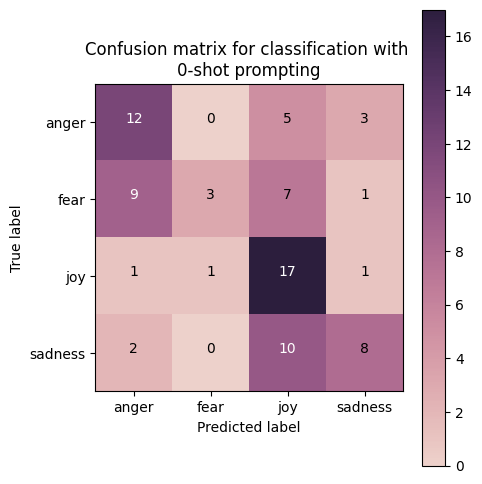

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Wont use using @mothercareuk @Mothercarehelp again!! These guys cant get nothing right!! #fuming
Class: anger

Text: Do you think humans have the sense for recognizing impending doom? 
Class: fear

Text: My future must be bright af.
Class: joy

Text: @LazyBoiSam blues... blues? 🤔
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:12<00:03,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.89 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.42it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.28 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:08,  1.69it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.92 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:11<00:03,  1.38it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.24 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:03<00:00,  3.18s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.52      0.60      0.56        20
        fear       0.71      0.25      0.37        20
         joy       0.56      0.75      0.64        20
     sadness       0.52      0.60      0.56        20

    accuracy                           0.55        80
   macro avg       0.58      0.55      0.53        80
weighted avg       0.58      0.55      0.53        80



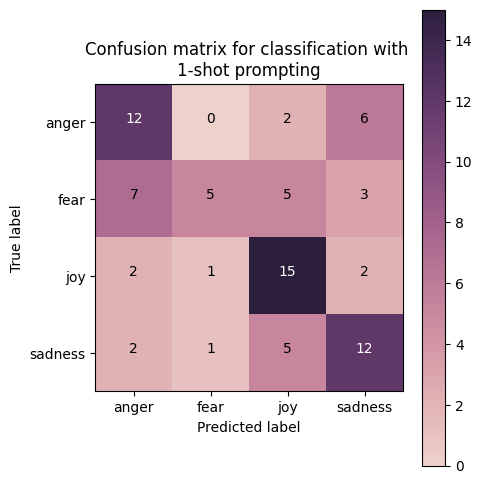

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Wont use using @mothercareuk @Mothercarehelp again!! These guys cant get nothing right!! #fuming
Class: anger

Text: If you be #angry, which may be the case, &amp; which may be unavoidable, see that the sudden excitement does not become sin. #AlbertBarnes
Class: anger

Text: @cc_yandian @HillaryClinton her team must draw from a hat for daily personality #drugged  #yeller #quiet #screamer #😂😂
Class: anger

Text: I believe women are more fiery because once a month they go through struggle and struggle is what develops a strong character.
Class: anger

Text: I don't mean to offend anyone, but 93.7 literally blames everything on white people. In some cases it's true, but a lot of times, it's not
Class: anger

Text: Do you think humans have the sense for recognizing impending doom? 
Class: fear


Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:03,  1.28it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.21 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.31it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.51 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.74 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.22 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:04,  1.09it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.81 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:51<00:00,  5.59s/it]



Results saved to ./llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.56      0.70      0.62        20
        fear       0.67      0.20      0.31        20
         joy       0.62      0.65      0.63        20
     sadness       0.50      0.70      0.58        20

    accuracy                           0.56        80
   macro avg       0.59      0.56      0.54        80
weighted avg       0.59      0.56      0.54        80



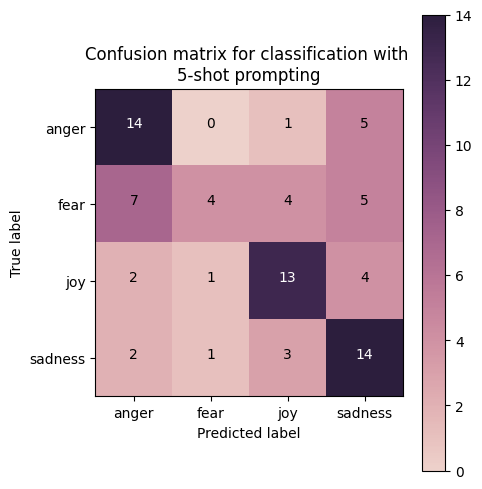

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

### Answer here
### **Few-Shot Prompting 實驗結果比較與討論**

根據混淆矩陣與準確率的數據分析，我們觀察到隨著範例數量的增加，模型的整體表現呈現上升趨勢，但在不同情緒類別上的影響有所不同。

#### **1. 實驗數據總結**

| 實驗設置 | 總體準確率 (Accuracy) | Anger (憤怒) 召回率 | Fear (恐懼) 召回率 | Joy (喜悅) 召回率 | Sadness (悲傷) 召回率 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Zero-shot (0範例)** | **50.00%** | 12/20 (60%) | 3/20 (15%) | **17/20 (85%)** | 8/20 (40%) |
| **1-shot (1範例)** | **55.00%** | 12/20 (60%) | **5/20 (25%)** | 15/20 (75%) | 12/20 (60%) |
| **5-shot (5範例)** | **56.25%** | **14/20 (70%)** | 4/20 (20%) | 13/20 (65%) | **14/20 (70%)** |

---

#### **2. 詳細分析與討論**

* **整體趨勢 (Overall Trend)：**
    * 從 **Zero-shot (50%)** 到 **5-shot (56.25%)**，模型的總體準確率呈現穩步提升。
    * 這證實了 **Few-shot prompting (少樣本提示)** 的有效性：透過在提示詞中提供少量範例，能幫助模型「校準」對任務的理解，提升分類能力，而無需重新訓練模型。

* **顯著改善的類別 (Significant Improvement)：**
    * **Sadness (悲傷)：** 進步幅度最大，從 0-shot 的 8/20 提升至 5-shot 的 14/20。這顯示「悲傷」的文本特徵可能較為含糊，需要範例來界定邊界，一旦提供範例，模型就能很好地掌握。
    * **Anger (憤怒)：** 在 5-shot 時也獲得了顯著提升 (12 -> 14)，顯示更多樣化的範例有助於捕捉不同語氣的憤怒表達。

* **持續困難的類別 (Persistent Challenge)：**
    * **Fear (恐懼)：** 在所有測試中表現始終最差 (Recall 僅 15% - 25%)。
    * 從混淆矩陣可見，`fear` 經常被誤判為 `sadness` 或 `anger`。這可能意味著「恐懼」在社交媒體文本中的表達往往伴隨著焦慮或抱怨，與其他負面情緒高度重疊，僅靠少數範例難以完全區分。

* **表現下降的異常現象 (Performance Drop)：**
    * **Joy (喜悅)：** 這是唯一隨著範例增加而表現**下降**的類別 (85% -> 75% -> 65%)。
    * **推測原因：** 0-shot 時模型對 `joy` 的預設理解非常廣泛且準確。然而，我們提供的 Few-shot 範例可能包含了某些特定的 `joy` 表達方式（例如特定俚語或反諷），這反而限制了模型的判斷標準，導致它對一般性的 `joy` 文本產生了「過度擬合」(Overfitting to examples) 或定義窄化的現象。

#### **3. 結論**

本次實驗展示了 In-Context Learning 的潛力與侷限性。雖然增加範例數量 (5-shot) 能有效提升對模糊情緒 (如 Sadness) 的辨識能力，但也可能對原本表現良好的類別 (如 Joy) 造成干擾。因此，在實際應用中，**挑選高品質、具代表性且多樣化的範例 (Representative Examples)** 比單純增加範例數量更為關鍵。

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [52]:
# Answer here
import pandas as pd
import os

# 1. 設定結果檔案路徑
result_dir = "./results/llm_classification_results"
file_0_shot = f"{result_dir}/results_samples_20_shots_0.csv"
file_1_shot = f"{result_dir}/results_samples_20_shots_1.csv"
file_5_shot = f"{result_dir}/results_samples_20_shots_5.csv"

# 2. 檢查檔案並讀取
if os.path.exists(file_0_shot) and os.path.exists(file_5_shot):
    df_0 = pd.read_csv(file_0_shot)
    df_1 = pd.read_csv(file_1_shot)
    df_5 = pd.read_csv(file_5_shot)

    # 3. 合併資料以便比較
    # 假設這三次實驗的測試資料順序是一樣的 (因使用了相同的 random_state=42 進行採樣)
    df_compare = df_0[['text', 'true_emotion']].copy()
    df_compare['pred_0'] = df_0['predicted_emotion']
    df_compare['pred_1'] = df_1['predicted_emotion']
    df_compare['pred_5'] = df_5['predicted_emotion']

    # --- 案例分析 1: 改善案例 (Improved) ---
    # 定義：0-shot 判斷錯誤 -> 5-shot 判斷正確
    improved_cases = df_compare[
        (df_compare['pred_0'] != df_compare['true_emotion']) & 
        (df_compare['pred_5'] == df_compare['true_emotion'])
    ]
    
    print(f"\n=== 改善案例 (Improved: 0-shot 錯 -> 5-shot 對) - 共 {len(improved_cases)} 筆 ===")
    if not improved_cases.empty:
        try:
            print(improved_cases[['text', 'true_emotion', 'pred_0', 'pred_5']].head(3).to_markdown(index=False))
        except ImportError:
            print(improved_cases[['text', 'true_emotion', 'pred_0', 'pred_5']].head(3))

    # --- 案例分析 2: 變差案例 (Worsened) ---
    # 定義：0-shot 判斷正確 -> 5-shot 判斷錯誤
    worsened_cases = df_compare[
        (df_compare['pred_0'] == df_compare['true_emotion']) & 
        (df_compare['pred_5'] != df_compare['true_emotion'])
    ]
    
    print(f"\n=== 變差案例 (Worsened: 0-shot 對 -> 5-shot 錯) - 共 {len(worsened_cases)} 筆 ===")
    if not worsened_cases.empty:
        try:
            print(worsened_cases[['text', 'true_emotion', 'pred_0', 'pred_5']].head(3).to_markdown(index=False))
        except ImportError:
            print(worsened_cases[['text', 'true_emotion', 'pred_0', 'pred_5']].head(3))

    # --- 案例分析 3: 始終錯誤案例 (Always Wrong) ---
    # 定義：0-shot 和 5-shot 都錯
    always_wrong_cases = df_compare[
        (df_compare['pred_0'] != df_compare['true_emotion']) & 
        (df_compare['pred_5'] != df_compare['true_emotion'])
    ]
    
    print(f"\n=== 始終錯誤案例 (Always Wrong) - 共 {len(always_wrong_cases)} 筆 ===")
    if not always_wrong_cases.empty:
        try:
            print(always_wrong_cases[['text', 'true_emotion', 'pred_0', 'pred_5']].head(3).to_markdown(index=False))
        except ImportError:
            print(always_wrong_cases[['text', 'true_emotion', 'pred_0', 'pred_5']].head(3))

else:
    print("錯誤：找不到結果檔案。")


=== 改善案例 (Improved: 0-shot 錯 -> 5-shot 對) - 共 10 筆 ===
| text                                                                                                                                         | true_emotion   | pred_0   | pred_5   |
|:---------------------------------------------------------------------------------------------------------------------------------------------|:---------------|:---------|:---------|
| @UKBlogAwards @ModishMale I would always be honest but it's great to feedback opinion to the brand - don't want to offend them #BlogHour     | anger          | joy      | anger    |
| @DailyMirror i love how theres no outrage that it's a white man but if it was a black man them BLM would be all over it regardless of reason | anger          | joy      | anger    |
| Trying to book holiday flights on @britishairways website is becoming a #nightmare                                                           | fear           | anger    | fear     |

=== 變差案例 (Worsened: 0-s

### **案例分析討論 (Case Study Discussion)**

#### **1. 改善案例 (Improved Cases: 0-shot 錯 -> 5-shot 對)**
這些案例顯示了提供範例如何幫助模型糾正對特定語境或反諷的誤解。
* **反諷與隱晦表達：** 例如 *"I would always be honest but it's great to feedback opinion... don't want to offend them"*，乍看之下有 *"great"* 等正面詞彙，0-shot 容易誤判為 `joy`。但透過 5-shot 範例，模型可能學會了識別這種「為了不冒犯而小心翼翼」背後隱藏的 `anger` 或不滿。
* **特定關鍵字的情境：** 關於 *"BLM"* 和 *"outrage"* 的推文，0-shot 可能被 *"love how"* 這個反諷的開頭誤導而判為 `joy`。5-shot 範例幫助模型理解這是一種諷刺性的憤怒表達。
* **生活用語的理解：** *"nightmare"* (惡夢) 在訂機票的情境下通常代表 `frustration` (anger) 或 `fear` (焦慮)。0-shot 判為 `anger` 其實也算合理，但 5-shot 讓模型更傾向於標註資料中的 `fear` (可能與焦慮、擔憂有關)，這顯示模型根據範例調整了對 `fear` 的定義邊界。

#### **2. 變差案例 (Worsened Cases: 0-shot 對 -> 5-shot 錯)**
這些案例揭示了 Few-shot prompting 可能帶來的副作用——過度擬合範例中的特徵。
* **動作與情緒的連結：** *"frown a bit"* (皺眉) 通常與生氣有關，0-shot 正確判斷為 `anger`。但在 5-shot 後被誤判為 `sadness`，這可能是因為範例中包含了將皺眉、低落連結到悲傷的例子，導致模型過度推論。
* **關鍵字誤導：** *"forced smile"* (強顏歡笑) 本質上是 `joy` (或至少是試圖表現 joy)，0-shot 判斷正確。但 5-shot 卻判為 `sadness`，可能是因為範例中包含了「笑中帶淚」或「苦笑」被標記為悲傷的例子，讓模型誤以為強迫的笑容就是悲傷。

#### **3. 始終錯誤案例 (Always Wrong Cases: 0-shot & 5-shot 皆錯)**
這些案例通常具有高度的歧義性，或者是標註資料本身可能存在爭議。
* **混合情緒：** 部分案例包含了 *"#sad #happy #angry"* 等多個矛盾的標籤。這種文本本身就包含多種情緒，模型（無論是 0-shot 還是 5-shot）捕捉到 `sadness` 其實是合理的，但真實標籤卻是 `anger`，這顯示了單一標籤分類在處理混合情緒時的局限性。
* **含糊不清：** *"I hope my hustle don't offend nobody"* 這句話本身更像是一種聲明或擔憂 (`fear`)，被標記為 `anger` 可能需要更多的上下文（例如說話者是在回應某人的挑釁）。模型在缺乏上下文的情況下很難做出與人工標註一致的判斷。

#### **總結**
Few-shot prompting 確實能幫助模型「校準」對特定標籤的定義（如將反諷的 love 識別為 anger），但同時也引入了新的偏見（如將皺眉一律視為悲傷）。對於包含多種情緒標籤的複雜文本，單純增加範例數量可能無法解決根本的歧義問題。

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---